In [45]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from pandas import melt, pivot_table
import seaborn as sb
import numpy as np

📝조선시대 역대 왕의 수명을 조사한 데이터

In [46]:
kl = load_data('kings_life')
kl

[data] https://data.hossam.kr/data/lab06/kings_life.xlsx
[desc] 조선시대 역대 왕의 수명을 조사한 데이터 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,왕,수명
0,태조,73
1,정종,62
2,태종,45
3,세종,53
4,문종,38
5,단종,16
6,세조,51
7,예종,28
8,성종,37
9,연산,30


In [47]:
kl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   왕       27 non-null     object
 1   수명      27 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 564.0+ bytes


In [48]:
# 기술통계량
kl_d = kl.describe()
kl_d

,수명
count,27.000000
mean,46.037037
std,16.173296
min,16.000000
25%,33.000000
50%,45.000000
75%,56.000000
max,82.000000


In [49]:
mode = kl['수명'].mode()
one_mode = kl['수명'].mode().iloc[0]
print(one_mode)
print(mode)

30
0    30
1    33
2    56
Name: 수명, dtype: int64


In [50]:
sorted = kl.sort_values(by = '수명', ascending = False)
sorted.head(10)


,왕,수명
20,영조,82
0,태조,73
25,고종,67
14,광해,66
1,정종,62
18,숙종,59
13,선조,56
10,중종,56
15,인조,54
3,세종,53


In [51]:
avg = kl['수명'].mean()

young = kl[kl['수명'] < avg]

count = len(young)
print(f"{young} ")
print(f"따라서 평균 {int(avg)}세의 나이보다 더 젊은 나이에 별세한 왕은 총{count}명입니다. ")


     왕  수명
2   태종  45
4   문종  38
5   단종  16
7   예종  28
8   성종  37
9   연산  30
11  인종  30
12  명종  33
16  효종  40
17  현종  33
19  경종  36
22  순조  44
23  헌종  22
24  철종  32 
따라서 평균 46세의 나이보다 더 젊은 나이에 별세한 왕은 총14명입니다. 


In [52]:
my_dpi = 200



plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False


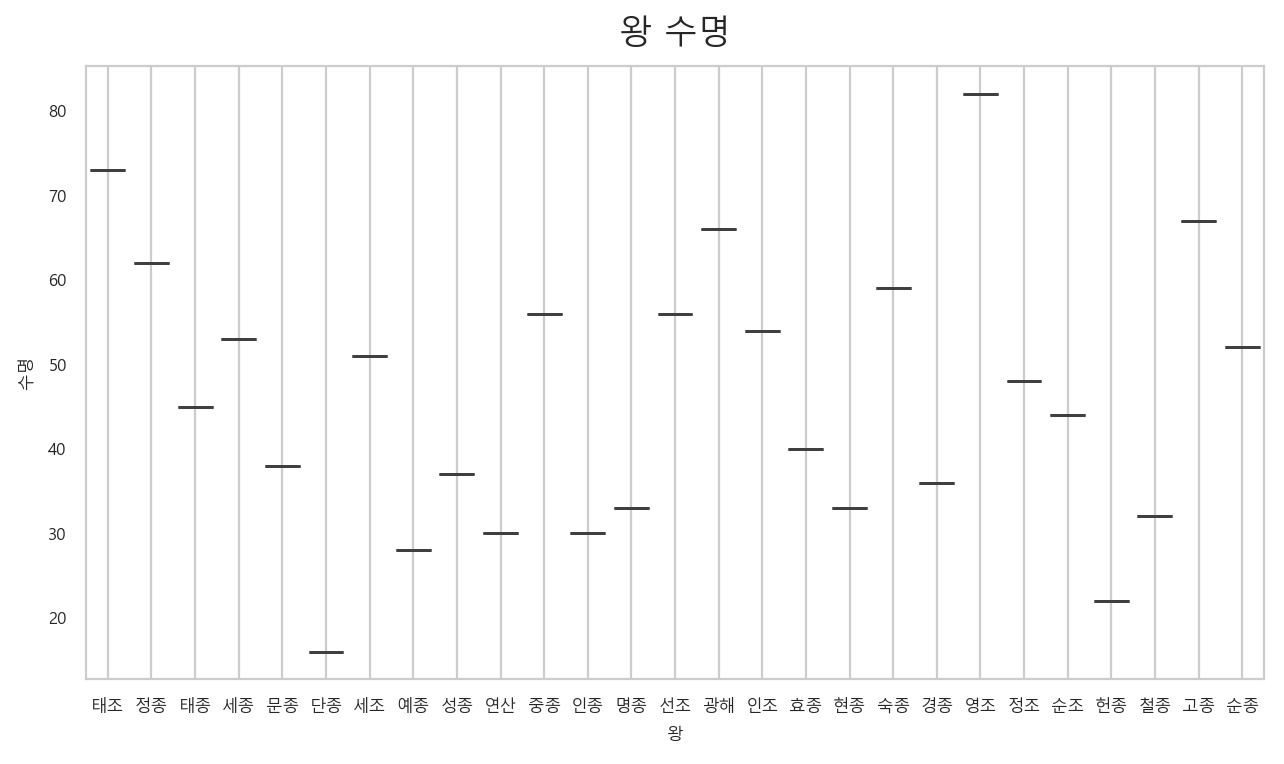

In [53]:
width_px = 1280
height_px = 760
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.boxplot(data=kl, x='왕',y='수명')
        

ax.set_title("왕 수명",fontsize=12, pad=8)
plt.grid()
plt.tight_layout()
plt.show()
plt.close()

#27명의 왕조들의 평균 수명이 46세라는 정보를 통해, 현대사회에 비해 평균 수명이 짧다는 정보를 예측할 수 있습니다. 이러한 현상의 원인을 당시 사회의 불리한 생활 조건과 일부 감염병에 대한 미흠한 대처 때문이라는 이유를 뒷받침할 수 있습니다. 
이에 반하여, 영조는 86세의 나이로 조선시대 역대 왕조 중 가장 오래 산 왕으로 뽑을 수있습니다. 이를 통해 건강한 식습관을 유지해왔다는 근거로 뒷받침 할 수 있습니다. 대표적으로 영조는 59세의 나이부터 73세까지 인삼을 100근 정도 섭취, 그리고 술 대신 생강차를 마셨다는 정보들을 조사할 수 있었습니다. 이와 같은 영조의 건강한 식습관은 현대사회에서도 건강한 식습관으로도 여겨져 조사가 이어지고 있다고 합니다.
 또한, 알 수 있는 점은 평균 나이보다 이른 나이에 별세한 왕은 총 14명인 것으로 나타났습니다. 조선시대라는 역사적 배경에서 중요하게 알 수있는 점은 생활에 대한 질이 약하다는 것을 알 수 있습니다. 이러한 현상 때문에, 식습관 저하가 왕조들 사이에서도 이어졌는데 이중, 태종,경종, 철종 이렇게 세 명의 왕을 식습관 저하로 별세한 왕들로 선정하여 분석할 수 있었습니다.
 태종은 육식 애호가였고, 경종은 사망 직전 마지막 식사가 "간장게장과 생감"이였을 정도로 평소에 건강하지 못한 식습관을 유지한 왕이였다고 합니다. 마지막으로 철종은 술로 인한 건강 악화로 막걸리와 소주와 같은 술들을 가까이 여겼다고합니다. 이러한 과도한 음주로 인해 소화기 계통 약화와 결핵 등이 겹쳐 젊은 나이에 수명을 마쳤습니다.

📝금융사 중 외국기업(F)와 내국기업(K)의 주가 데이터 분석

In [54]:
stock = load_data('stock')
stock

[data] https://data.hossam.kr/data/lab06/stock.xlsx
[desc] 상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가 데이터 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,구분,주가
0,F,120
1,K,165
2,K,147
3,F,144
4,K,135
5,K,161
6,K,102
7,K,165
8,K,170
9,F,147


In [55]:
stock.describe()

,주가
count,24.000000
mean,153.000000
std,24.354269
min,102.000000
25%,142.750000
50%,150.000000
75%,163.500000
max,235.000000


In [56]:
describe = stock.groupby('구분')['주가'].describe()
describe

,count,mean,std,min,25%,50%,75%,max
구분,,,,,,,,
F,12.0,155.166667,27.764704,120.0,142.75,150.0,158.00,235.0
K,12.0,150.833333,21.425700,102.0,142.50,154.0,166.25,173.0


In [57]:
stock['주가'].mean()

np.float64(153.0)

In [58]:
mean = stock.groupby('구분')['주가'].mean()
mean

구분
F    155.166667
K    150.833333
Name: 주가, dtype: float64

In [59]:
my_dpi = 200



plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False


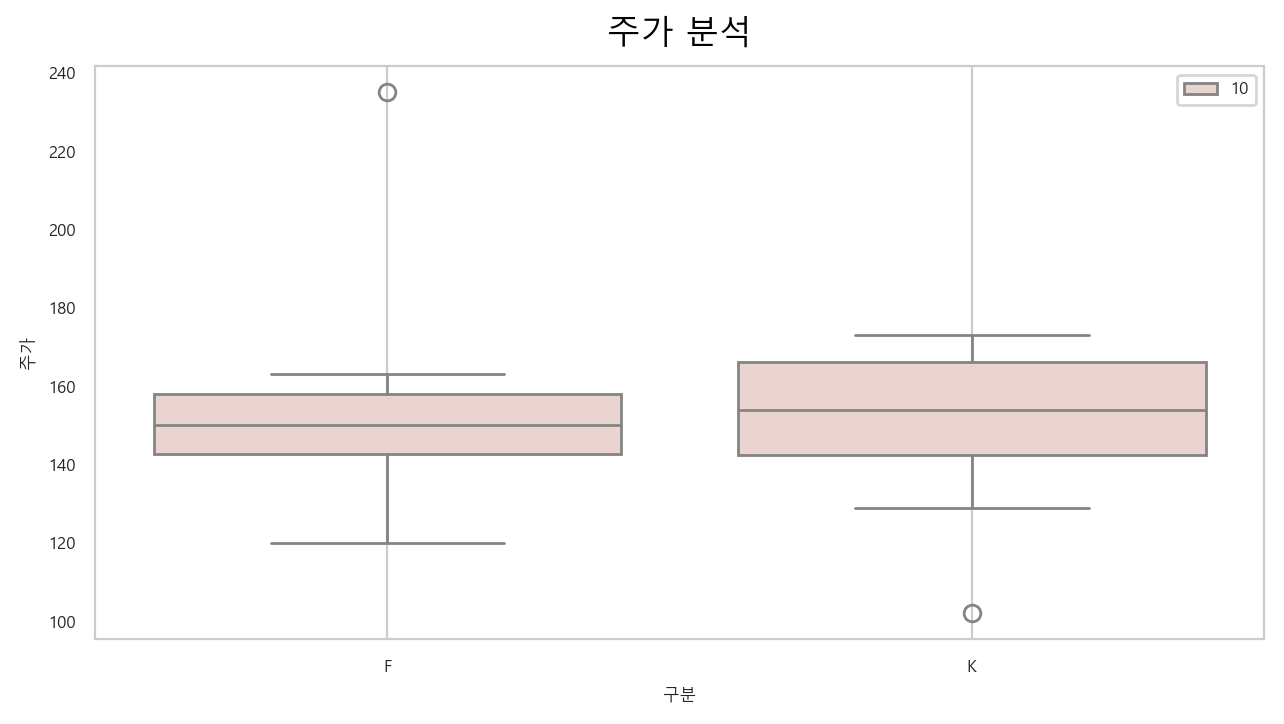

In [60]:
bin_count = 10

width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.boxplot(data=stock, x='구분', y='주가', hue = bin_count)
            

ax.set_title("주가 분석", color = "#000000", fontsize = 12, pad=8)

plt.grid()
plt.tight_layout()
plt.show()
plt.close()

#첫 번째로, 외국계기업 보다 내국기업이 사분위수 범위에서 외국계기업은 25%~50% 에 해당하는 부분에서 약 7 , 내국 기업은 약 12정도가 차이났습니다. 또한, 50%~75%에 해당하는 부분은 외국계기업이 약8, 내국 기업이 약 12로 내국 기업이 사분위수 범위가 넓다는 것을 알 수 있었습니다. 
두 번째로, 중위수를 중심으로 관찰했을 때, 내국기업이 더 높은 값으로 조회되는 것으로 보아 내국기업의 주가수준이 외국기업보다 높다는 사실을 확인할 수 있습니다.


📝포도농장에서 수집한 비료 종류에 따른 수확량 자료

In [61]:
grape = load_data('grape')
grape

[data] https://data.hossam.kr/data/lab06/grape.xlsx
[desc] 포도농장에서 수집한 비료 종류에 따른 수확량 자료 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,비료종류,수확량
0,A,39.3
1,B,11.4
2,A,26.6
3,A,23.7
4,B,25.8
5,A,28.5
6,A,24.2
7,A,17.9
8,B,16.5
9,B,21.1


In [62]:
g_d = grape.describe()
g_d

,수확량
count,11.000000
mean,23.572727
std,7.233131
min,11.400000
25%,19.500000
50%,24.200000
75%,26.200000
max,39.300000


In [63]:
grape.groupby('비료종류')['수확량'].describe()

,count,mean,std,min,25%,50%,75%,max
비료종류,,,,,,,,
A,7.0,26.357143,6.578211,17.9,23.950,24.3,27.550,39.3
B,4.0,18.700000,6.172520,11.4,15.225,18.8,22.275,25.8


In [64]:
my_dpi = 200



plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False

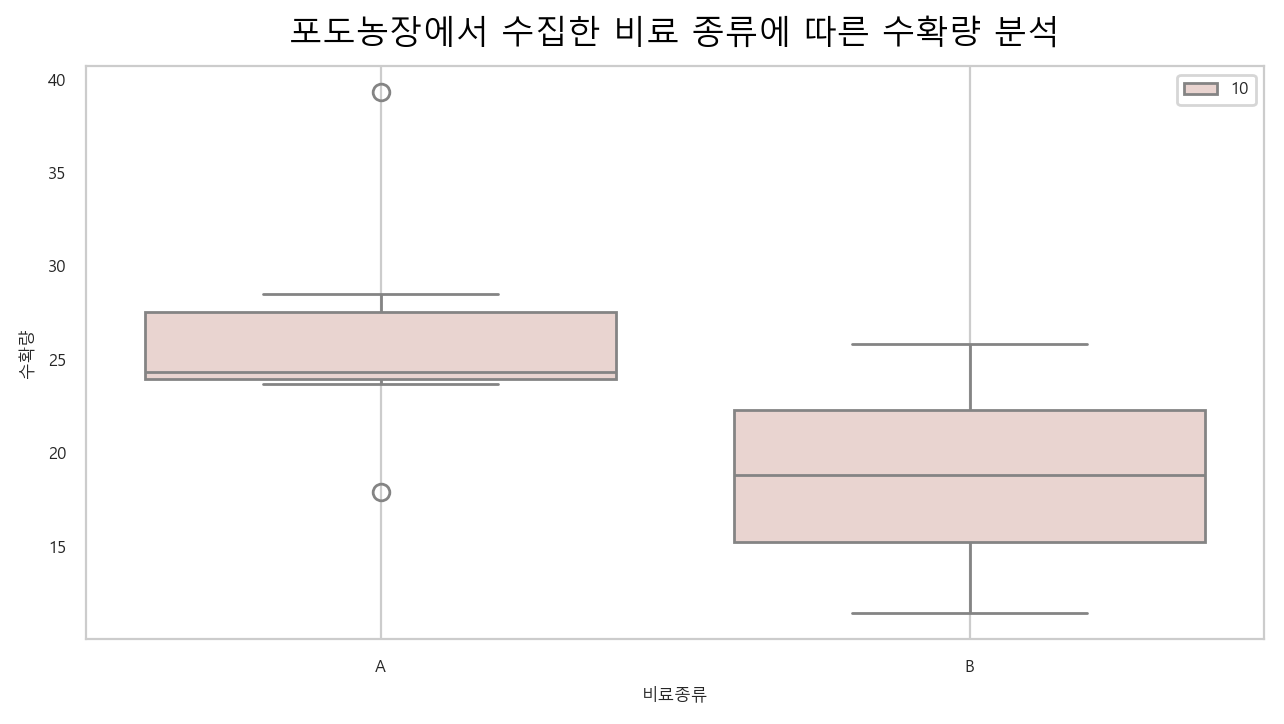

In [65]:
bin_count = 10

width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.boxplot(data=grape, x='비료종류', y='수확량', hue = bin_count)
            

ax.set_title("포도농장에서 수집한 비료 종류에 따른 수확량 분석", color = "#000000", fontsize = 12, pad=8)

plt.grid()
plt.tight_layout()
plt.show()
plt.close()

우선 두 비료의 표준편차는 6으로 비슷한 수치의 차이가 발생합니다. 하지만, 평균과 사분위수 분포에서 수치적인 차이를 보이는데, 첫 번째로, A 비료는 B비료에 비해서 값이 밀집되어있다는 점을 확인할 수 있다. 또한, 이상치 때문에 평균 수확량에 영향을 미친다는 사실을 알 수 있습니다. 따라서, A 비료가 B비료보다 대사활동을 더욱 활발하게 했다는 점을 알 수 있습니다. 
 대표적으로 마그네슘을 예시로 들 수 있는데 A비료와 B비료에서 영양분 사용 방식의 차이에 대한 궁금증을 자아낼 수 있습니다.  
두 번째로, B비료는 A값보다 평균 수확량이 약 10정도가 차이납니다. 또한 A비료는 수확량이 미세한 수치로 밀집되어있는 반면에 B수확량은 A수확량보다 수확량이 고르게 분포되어있을 뿐더러 이상치 마저 없어 영양분 공급 부분에서도 A 비료보다 더 나은 방법으로 수확했을 가능성이 큽니다.   

📝통계학개론을 수강하는 두 학과의 성적분포 비교

In [66]:
ag = load_data('analysis_grade')
ag

[data] https://data.hossam.kr/data/lab06/analysis_grade.xlsx
[desc] 통계학개론을 수강하는 두 학과(A, C)의 성적분포 데이터의 일부 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,학과,점수
0,C,54
1,A,52
2,A,37
3,C,41
4,A,67
5,C,43
6,A,73
7,C,51
8,C,55
9,A,15


In [67]:
ag.describe()

,점수
count,32.000000
mean,48.406250
std,19.097136
min,10.000000
25%,38.500000
50%,51.000000
75%,54.250000
max,90.000000


In [68]:
ag.groupby('학과')['점수'].describe()

,count,mean,std,min,25%,50%,75%,max
학과,,,,,,,,
A,20.0,43.750000,20.229928,10.0,29.50,42.5,55.00,78.0
C,12.0,56.166667,14.689720,41.0,50.25,52.5,54.25,90.0


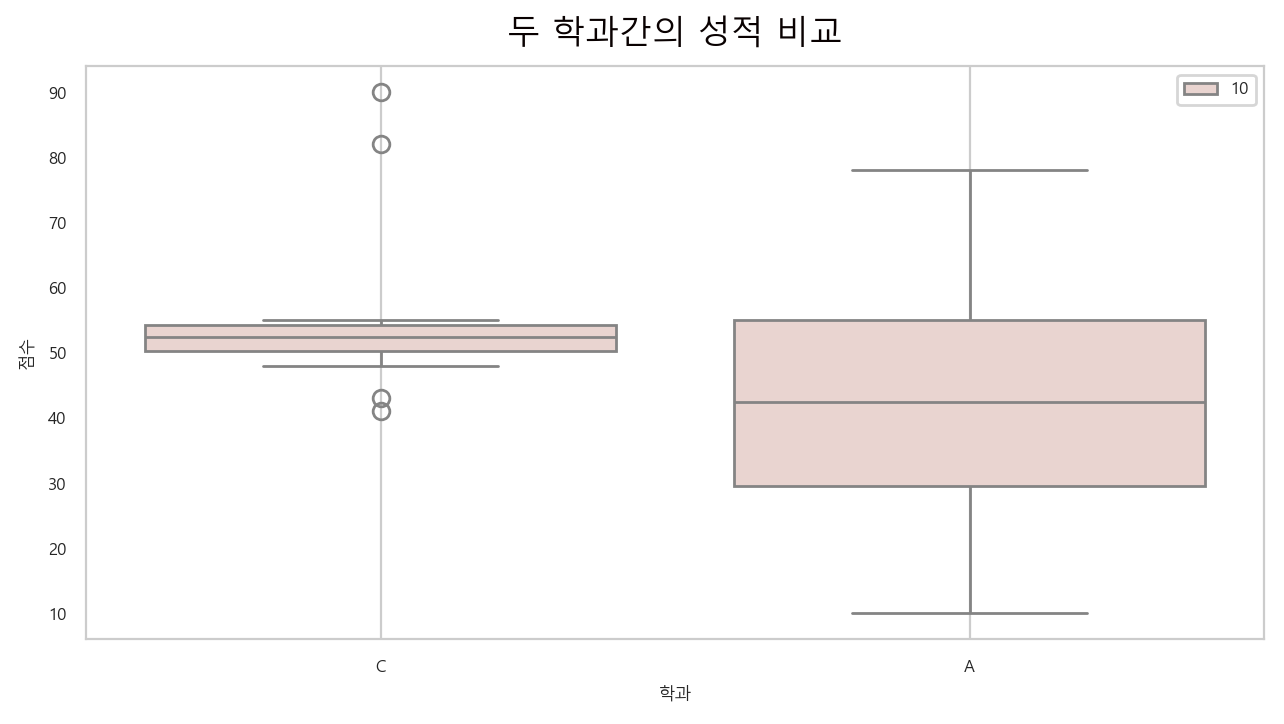

In [69]:
bin_count = 10

width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.boxplot(data=ag, x='학과', y='점수', hue = bin_count)
sb.set_style('darkgrid')
ax.set_title("두 학과간의 성적 비교", color = "#090101", fontsize = 12, pad=8)

plt.grid()
plt.tight_layout()
plt.show()
plt.close()

우선, C학과의 사분위수 분포가 A학과 보다 넓게 나타난 것으로 보아 A학과 점수의 값이 더욱 넓게 퍼져 나타난 것으로 알 수 있습니다. 또한, C학과에는 대략 50점~55점 사이에 점수분포가 주로 형성되어있습니다. 이러한 현상으로 알 수 있는 점은, 상대평가로 채점할 경우 값의 분포 때문에 미세한 차이로 인해 점수 확정이 어려워질 수 있다는 판단을 내릴 수 있습니다. 또한, c학과는 상위권과 하위권에 이상치가 다수 존재한다.즉, 편차가 크다는 점 또한 알 수 있습니다. 

다음, A학과에 대한 사실입니다. A학과는 값이 고르게 분포되어있어, 채점하기 수월할 것 같다고 판단할 수 있습니다. 

📝통계학 전공학생과 전산학 전공 학생에 대한 통계학 과목 중간고사 성적 & 기말고사 성적 

In [70]:
scg = load_data('stat_comp_grade')
scg

[data] https://data.hossam.kr/data/lab06/stat_comp_grade.xlsx
[desc] 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,전공,중간고사,기말고사
0,STAT,34,86
1,STAT,50,77
2,STAT,75,74
3,COMP,76,96
4,COMP,61,78
5,COMP,65,40
6,COMP,31,68
7,STAT,47,57
8,STAT,94,82
9,COMP,49,57


In [71]:
#1.
scg['변환'] = scg['전공'].replace({'STAT':1, 'COMP':2})
scg

C:\Users\itwill\AppData\Local\Temp\ipykernel_30468\1648769569.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  scg['변환'] = scg['전공'].replace({'STAT':1, 'COMP':2})


,전공,중간고사,기말고사,변환
0,STAT,34,86,1
1,STAT,50,77,1
2,STAT,75,74,1
3,COMP,76,96,2
4,COMP,61,78,2
5,COMP,65,40,2
6,COMP,31,68,2
7,STAT,47,57,1
8,STAT,94,82,1
9,COMP,49,57,2


In [72]:
# 2.중간고사
scg['중간고사'].describe()

count    20.000000
mean     65.150000
std      19.647619
min      31.000000
25%      48.500000
50%      67.500000
75%      78.500000
max      94.000000
Name: 중간고사, dtype: float64

In [73]:
mid_mean = scg['중간고사'].mean()
down_mid = scg[scg['중간고사'] < mid_mean] [['전공', '중간고사']]
count_mid = len(down_mid)
print(down_mid)
print(f"중간고사에서 평균 점수보다 낮은 점수를 기록한 학생들은 총 {count_mid}명 입니다.")


      전공  중간고사
0   STAT    34
1   STAT    50
4   COMP    61
5   COMP    65
6   COMP    31
7   STAT    47
9   COMP    49
10  STAT    38
11  STAT    65
12  STAT    47
중간고사에서 평균 점수보다 낮은 점수를 기록한 학생들은 총 10명 입니다.


In [74]:
#2.기말고사
scg['기말고사'].describe()

count    20.000000
mean     75.650000
std      15.597824
min      40.000000
25%      66.000000
50%      79.000000
75%      85.250000
max      96.000000
Name: 기말고사, dtype: float64

In [89]:
scg.groupby('전공')['중간고사'].agg(['min', 'median','mean'])

,min,median,mean
전공,,,
COMP,31,70.5,65.625000
STAT,34,67.5,64.833333


In [92]:
scg.describe()

,중간고사,기말고사,변환
count,20.000000,20.000000,20.000000
mean,65.150000,75.650000,1.400000
std,19.647619,15.597824,0.502625
min,31.000000,40.000000,1.000000
25%,48.500000,66.000000,1.000000
50%,67.500000,79.000000,1.000000
75%,78.500000,85.250000,2.000000
max,94.000000,96.000000,2.000000


In [76]:
#3.중간고사
my_dpi = 200



plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False

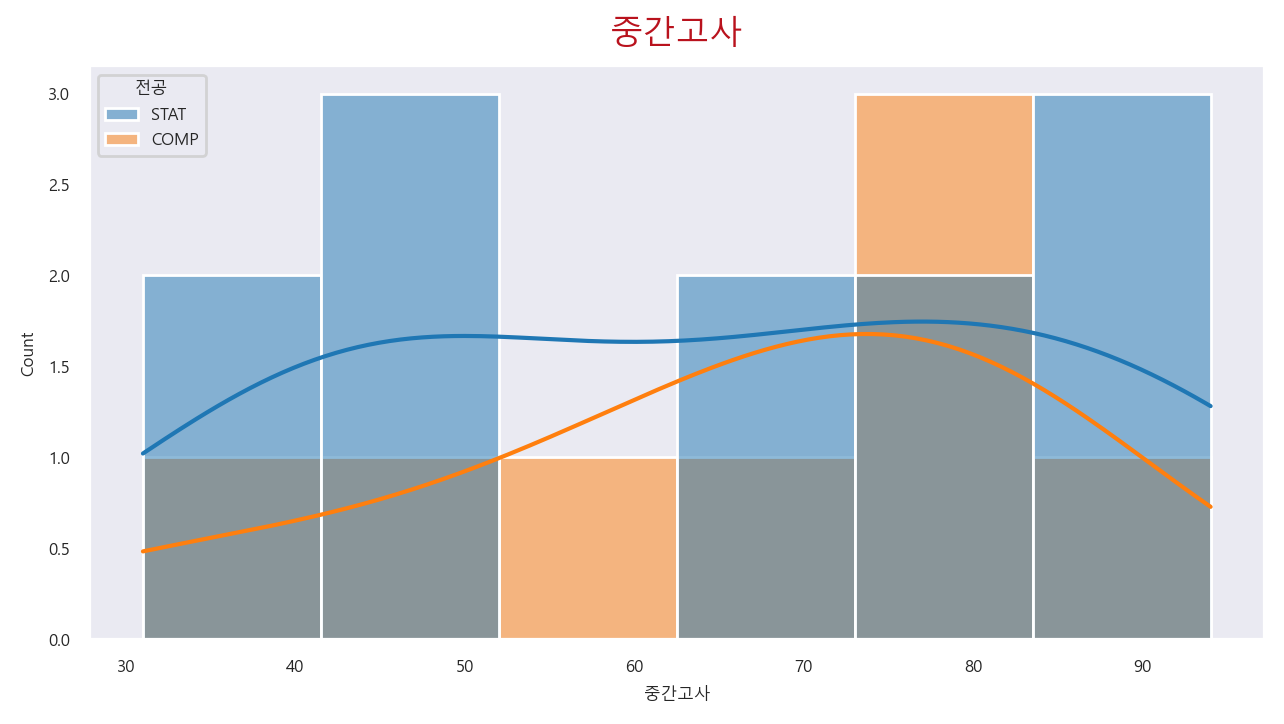

In [77]:
width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.histplot(data=scg, x="중간고사", color = "#D92626", hue = '전공',kde = True)
sb.set_style("whitegrid")           

ax.set_title("중간고사", color = "#B9121D", fontsize = 12,pad=8)

plt.grid()
plt.tight_layout()
plt.show()
plt.close()

std값을 통해 평균과 약 16점 정도 차이가 나는 것을 확인할 수 있습니다. 따라서, 사분위수 50%에 분포되어있는 학생이 거의 없다고 분석할 수 있습니다.
  그 중, 통계학과 학생이 전산학과 학생들에 비해 편차가 심한 것으로 볼 수 있고, 1사분위수 즉,30~40점, 40~50점까지 선의 차이가 극명하게 나타나는 것으로 보아 통계학과 학생들 중 소수가 전산학과 학생들 보다 문제 이해를 미숙하게 했다는 것을 알 수 있습니다. 또한, 
통계학과 학생들은 약 45점정도에 몰려있는 반면 전산학과 학생들은 50명 정도에 분포했다는 사실을 알 수 있습니다. 또한, 전산학과의 곡선이 오른쪽으로 치우친 것을 보아 절반 이상의 학생이 70점 정도에 분포한다는 것을 알 수 있습니다. 
마지막으로, 31점과 34점에 최저점이 존재한다는 사실을 알 수 있는데, 시험범위 내용의 이해가 미숙한 학생들의 시험 준비 정도가 비슷하다는 것을 알 수 있습니다.

#

C:\Users\itwill\AppData\Local\Temp\ipykernel_30468\1719221113.py:16: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_30468\1719221113.py:16: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_30468\1719221113.py:16: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_30468\1719221113.py:16: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_30468\1719221113.py:16: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_30468\1719221113.py:16: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) Arial.
  plt.ti

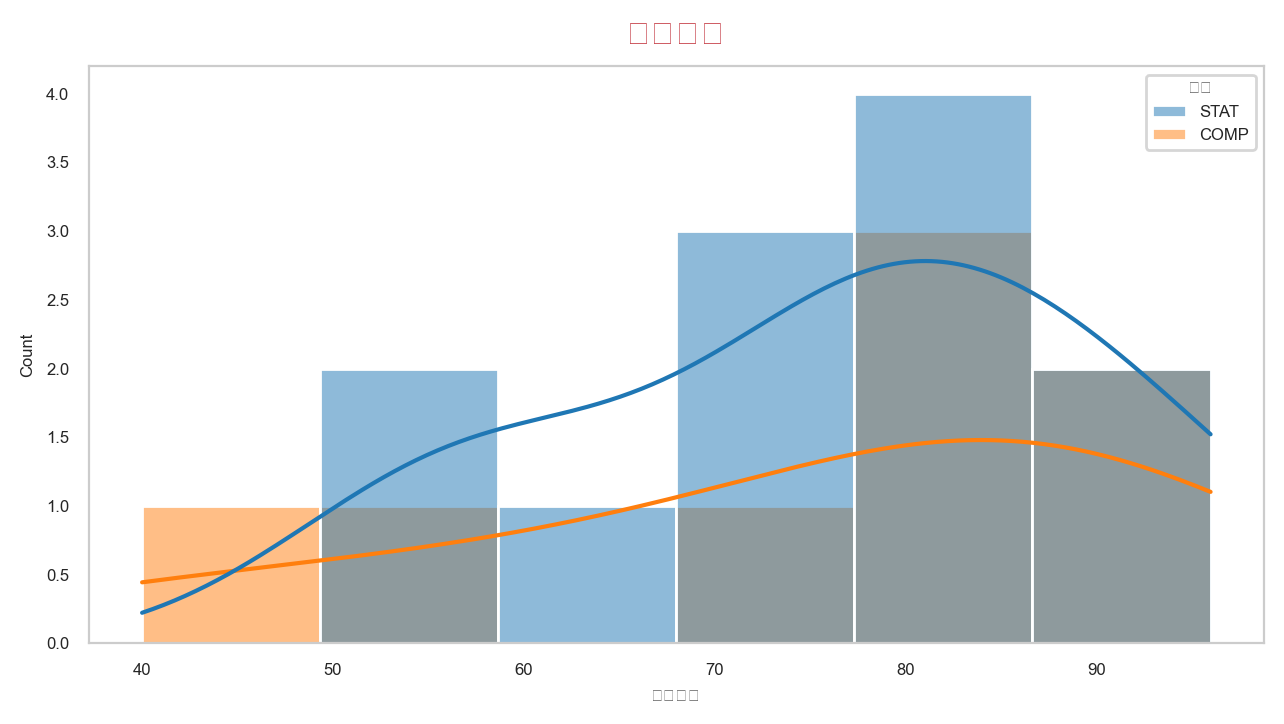

In [78]:
#3.기말고사
width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.histplot(data=scg, x="기말고사", color = "#D92626", hue = '전공',kde = True)
sb.set_style("whitegrid")           

ax.set_title("기말고사", color = "#B9121D", fontsize = 12,pad=8)

plt.grid()
plt.tight_layout()
plt.show()
plt.close()

일단, 두 학과의 시험결과는 표준편차가 15점이라는 사실을 바탕으로 두 학과 모두 표준편차의 동일성을 발견할 수 있습니다. 하지만, 표준편차가 비슷한 것과는 달리 점수 분포에서 차이점이 나타납니다. 이러한 사실을 바탕으로 두 학과에서 나타나는 점수 분포의 차이를 바탕으로 분석할 수 있었습니다.
우선, 통계학과 학생들이 전산학과 학생들에 비해 오른쪽으로 치우쳤다는 사실 나타남을 알 수 있습니다. 하지만, 96점이 최고점이라는 것에도 불구하고, 약 85점 정도에 많은 학생들이 분포한다는 점을 통해, "왜 80점대에 학생수가 많이 몰려있을까?" 라는 궁금증을 가질 수 있습니다. 이로 인해, 시험 문제 난위도가 높아서 오답률이 발생했다는 사실보다, 마킹실수나 시간 부족 등과 같은 실수로 인한 점수 하락이 발생했을 가능성이 큽니다. 
 마지막으로, 값의 분포를 비교해보았을 때 전산학과는 60점대에 분포하는 학생들이 없습니다. 즉, 점수대가 고르게 분포해있는 통계학과 학생들에 비해 점수 분포가 고르지 못한 전산학과 학생들은 시험준비가 부족하다는 사실을 알 수 있습니다. 이러한 현상을 바탕으로 전산학과 시험결과를  "시험범위의 내용을 완벽히 이해한 학생" 과 "시험범위 내용에 대해 이해가 어려운 학생" 과 같이 두 집단으로 나누어 분석해볼 수 있습니다. 

In [79]:
my_dpi = 200


plt.rcParams['font.family']
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False

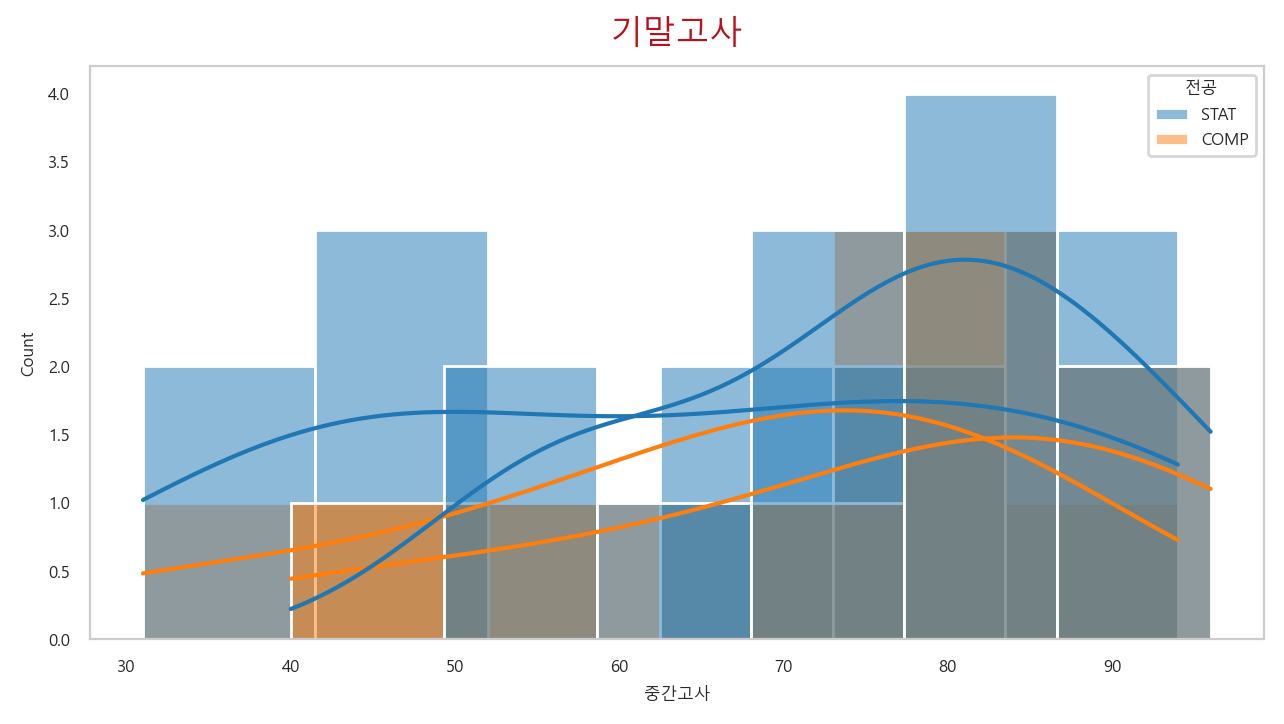

In [80]:
#4.
width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.histplot(data=scg, x="중간고사", color = "#D92626", hue = '전공',kde = True)
sb.histplot(data=scg, x="기말고사", color = "#264DD9", hue = '전공',kde = True)
          

ax.set_title("기말고사", color = "#B9121D", fontsize = 12,pad=8)

plt.grid()
plt.tight_layout()
plt.show()
plt.close()

📝서울시의 행정구역별 노인복지시설

In [81]:
sl = load_data('senior_lsf')
sl

[data] https://data.hossam.kr/data/lab06/senior_lsf.xlsx
[desc] 서울시의 행정구역별 노인복지시설의 수를 조사한 가상의 데이터
[!] Cannot read metadata


,지역명,복지시설
0,Jongno-gu,61
1,Jung-gu,53
2,Yongsan-gu,110
3,Seongdong-gu,155
4,Gwangjin-gu,103
5,Dongdaemun-gu,146
6,Jungnang-gu,128
7,Seongbuk-gu,158
8,Gangbuk-gu,111
9,Dobong-gu,139


In [82]:
sl_head = sl.head(11)
sl_head

,지역명,복지시설
0,Jongno-gu,61
1,Jung-gu,53
2,Yongsan-gu,110
3,Seongdong-gu,155
4,Gwangjin-gu,103
5,Dongdaemun-gu,146
6,Jungnang-gu,128
7,Seongbuk-gu,158
8,Gangbuk-gu,111
9,Dobong-gu,139


In [83]:
my_dpi = 300


plt.rcParams['font.family']
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False

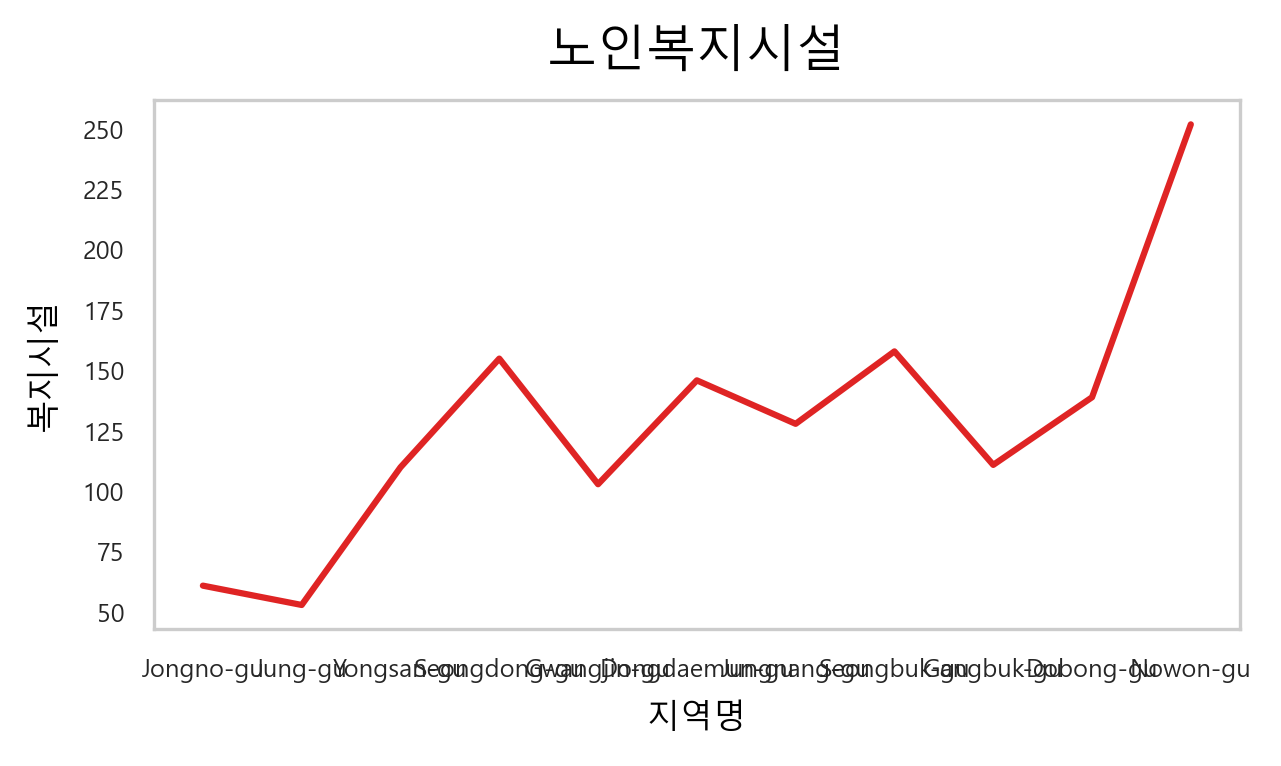

In [84]:
width_px = 1280
height_px = 760
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용

sb.lineplot(data=sl_head, x="지역명", y="복지시설", color="#DF2424" )
            
ax.set_title("노인복지시설", color = "#000000", fontsize = 12,  pad=8)
ax.set_xlabel("지역명", color ="#000000", fontsize=8, labelpad=5 )
ax.set_ylabel("복지시설", color="#000000", fontsize=8, labelpad=5)

plt.grid()
plt.tight_layout()
plt.show()
plt.close()

상위 10개의 지역을 뽑았을 때, 성북구에서 노인복지시설에 가장 많이 나타난다고 볼 수 있습니닫. 성북구는 타 도시와는 달리, 지역적인 특징이 편리시설의 집중분포와 연관되어 있는 시설들이 많습니다. 또한, 높은 고령 인구 비율에 대응하는 적극적인 복지 정책 덕분에 노인 복지시설의 수가 많다는 것을 판단할 수 있습니다.

📝종사자 규모별 업체수 분석

In [85]:
jbs = load_data('jobs_by_scale')
jbs

[data] https://data.hossam.kr/data/lab06/jobs_by_scale.xlsx
[desc] 종사자 규모별 업체수를 2015년과 2016년도에 걸쳐 조사한 데이터 (출처: 국가통계포털)
[!] Cannot read metadata


,종사자규모별,2015,2016
0,1~4명,553.5,576.7
1,5~9명,211.6,216.8
2,10~29명,194.7,195.5
3,30~49명,227.4,227.4
4,50~99명,152.8,155.7
5,100~199명,221.9,220.6
6,200~299명,80.9,81.0
7,300~999명,100.5,99.3
8,1000명 이상,557.6,549.7


In [86]:
jbs_long = jbs.melt(id_vars = '종사자규모별', var_name='연도', value_name = '값')
jbs_long

,종사자규모별,연도,값
0,1~4명,2015,553.5
1,5~9명,2015,211.6
2,10~29명,2015,194.7
3,30~49명,2015,227.4
4,50~99명,2015,152.8
5,100~199명,2015,221.9
6,200~299명,2015,80.9
7,300~999명,2015,100.5
8,1000명 이상,2015,557.6
9,1~4명,2016,576.7


In [87]:
my_dpi = 200

plt.rcParams['font.family']
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False

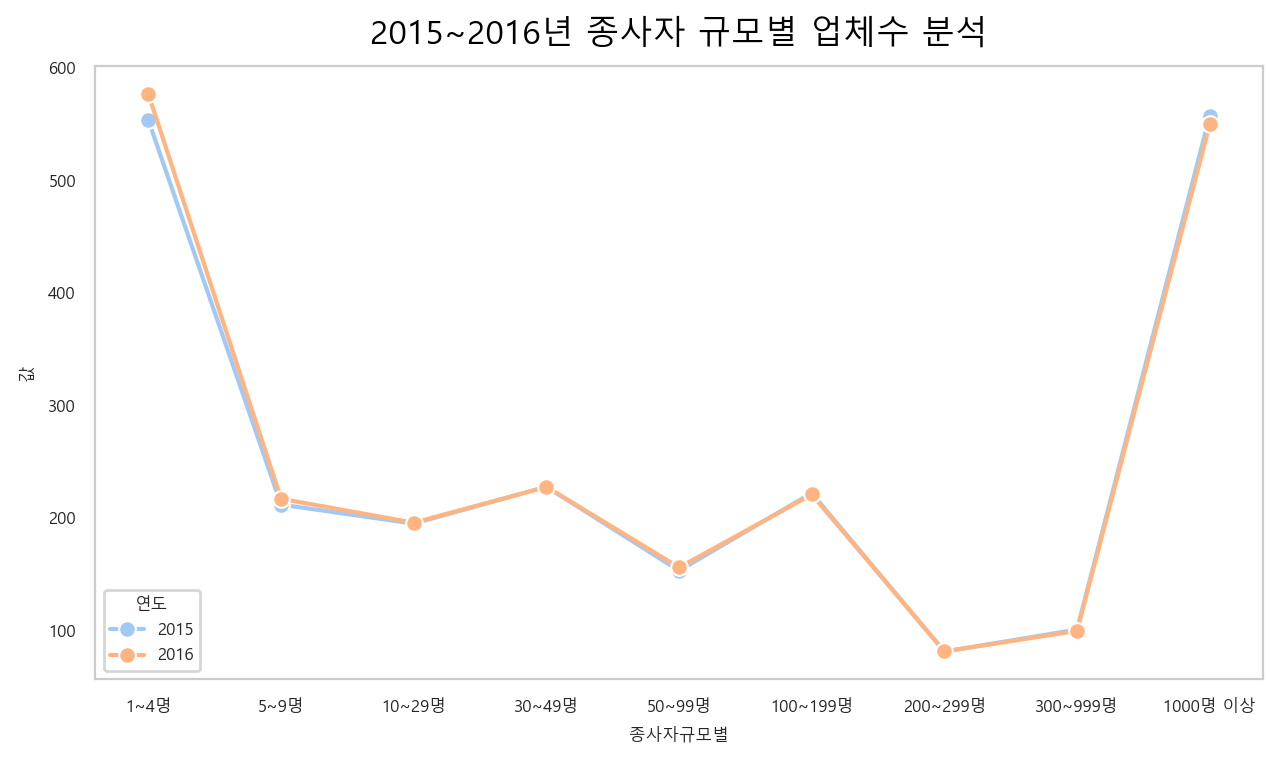

In [88]:

plt.figure(figsize=(width_px/my_dpi, height_px/my_dpi), dpi=my_dpi,)

sb.lineplot(data=jbs_long,x='종사자규모별',y='값',hue='연도', marker='o', palette="pastel")
palette={'2015':"#F4A9EC", '2016':"#93A7EB"}
plt.title("2015~2016년 종사자 규모별 업체수 분석", color = "#000000", fontsize=12, pad=8)

plt.grid()
plt.tight_layout()
plt.show()
plt.close()

그래프를 통해 1~4명의 인원수를 포함하는 업체, 그리고 1000명이상의 인원수를 포함하는 업체에서 다른 업체들에 비해 압도적인 값을 차지하고 있습니다. 이를 통해 대규모 업체의 빈도가 다른 기업 규모에 비해 압도적으로 높다는 사실을 확인할 수 있습니다. 개인 사업자 중심으로 운영되는 업체와 일부 대기업 집단이 동시에 큰 비중을 차지한다는 특성을 갖고 있습니다. 또한, 2015년도와 2016년도 사이에 규모별 업체 수의 변화가 거의 나타나지 않는 것으로 확인되었다. 이를 통해 글로벌 경기 둔화와 내수 침체의 영향으로 기업들의 채용 확대 움직임이 크게 나타나지 않았던 시기로 판단할 수 있습니다. 